# Assignment 2 - Object Detection | Semantic Segmentation

This notebook contains the required task for the second assignment of the Software for Advanced Machine Learning course. Read the task description and implement the empty code cells. Each section represents a stage along implementing your task [Object Detection or Semantic Segmantation], from loading and inspecting the dataset to testing a **pre-trained** model. The sections are to guide you but you do not have to follow that specific order. 

Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [Canvas](https://canvas.elte.hu) or upload the link to the Colab notebook itself. If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU accelerataion in Edit -> Notebook settings, otherwise inference can be very slow.

## Rules and Comments
- From the list of datasets and tasks listed in canvas, each student was atributed **1 task and 1 dataset** to use within this assignment. Please confirm yours in the Canvas assignment's description. 
- The emphasis of this assignment is put in the way you use and compare the different models. The metrics you present are very important.
- As always, copying others' code will make you fail the homework automatically (and thus the course). Remember that you will have to defend the assignment at the end of the semester.
- **Deadline is November 26**
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- Feel free to add more code cells as needed. But don't put code into external Python files to ease the reviewing.
- Please add your name and Neptun ID below for easier identification.

**Name:**  Muhammad Samadzade

**Neptun ID:** SARVRR


## Task description
Given your task (Semantic Segmentation or Object Detection), you have to test three (3) pretrained models on the test set of a given dataset, comparing the results between the models. For the comparison, you have to use at least three (3) metrics commonly used in your task.

For example, if student A is given Object Detection task and the Ballons v2 dataset, then his/her task is to choose 3 pretrained object detection models [R-CNN, YOLO, ...] and evaluate them on the Ballons v2 test set, comparing the results using 3 metrics [mAP, Recall, ...]. If a dataset does not have a testing set, then the student should split at least 10% of the training set to create the test set.

For running test/evaluation/inference on a pre-trained model, it is important to know what are the model requirements, so that the input is preprocessed accordingly.
Make sure to explore the data and **present detailed evaluation metrics**.

**Please answer the questions.**



## 0. Import libraries
Import all libraries/packages that you believe will help you fulfil the task, but **for the network only PyTorch can be used.**

In [3]:
%matplotlib inline 
from matplotlib import pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image, ImageDraw,ImageOps
import pandas as pd
import json

import os

import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
from matplotlib.patches import Rectangle
import math



In [4]:
!pip install facenet_pytorch

In [5]:
!pip install -U insightface


     |████████████████████████████████| 431 kB 4.6 MB/s 
     |████████████████████████████████| 12.7 MB 41.7 MB/s 
     |████████████████████████████████| 631 kB 57.2 MB/s 
  Created wheel for insightface: filename=insightface-0.5-cp37-cp37m-linux_x86_64.whl size=975528 sha256=b6484237804b59673e5eba3b1af00a9b42762b8cbab4420fb5d8b45ee75c9b03
  Stored in directory: /root/.cache/pip/wheels/10/41/10/d7c3a6acc5896f7e5ebdeb0456579bc6e1dce43bf4920f23a4
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654020 sha256=d944ab6e775d78ce01ef7ec30f839ceed9386de6f593679f2a2b42724dec8600
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built insightface imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [6]:
!pip install onnxruntime

     |████████████████████████████████| 4.9 MB 4.9 MB/s 


In [7]:
!pip install git+https://github.com/elliottzheng/face-detection.git@master

  Cloning https://github.com/elliottzheng/face-detection.git (to revision master) to /tmp/pip-req-build-9dmid7pw
  Running command git clone -q https://github.com/elliottzheng/face-detection.git /tmp/pip-req-build-9dmid7pw
  Created wheel for face-detection: filename=face_detection-1.0.5-py3-none-any.whl size=1638329 sha256=18cd5956617a184b2fe36665bb6a0ac6fd0b092d286bf0c40d391f74bbc84e63
  Stored in directory: /tmp/pip-ephem-wheel-cache-6d4bm33g/wheels/27/8f/8b/16350eed4526e15a515eda2f6ec106ad3a8646ade42452a993
Successfully built face-detection


In [9]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

from facenet_pytorch import MTCNN, InceptionResnetV1
from skimage import io
from face_detection import RetinaFace

In [10]:
# In order to use the dataset from the kaggle, we need to create the key for it
with open('kaggle.json', 'w') as outfile:
    json.dump({"username":"muhokun","key":"a6b57fb40fbcc902feed8fc2f84bc506"}, outfile)


# First it will download the dataset food 101, then unzip the zip file
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d kevinpatel04/celeba-original-wild-images
! unzip celeba-original-wild-images
# Now we will work on the images folder

Streaming output truncated to the last 5000 lines.
  inflating: Part 10/Part 10/091158.jpg  
  inflating: Part 10/Part 10/091159.jpg  
  inflating: Part 10/Part 10/091160.jpg  
  inflating: Part 10/Part 10/091161.jpg  
  inflating: Part 10/Part 10/091162.jpg  
  inflating: Part 10/Part 10/091163.jpg  
  inflating: Part 10/Part 10/091164.jpg  
  inflating: Part 10/Part 10/091165.jpg  
  inflating: Part 10/Part 10/091166.jpg  
  inflating: Part 10/Part 10/091167.jpg  
  inflating: Part 10/Part 10/091168.jpg  
  inflating: Part 10/Part 10/091169.jpg  
  inflating: Part 10/Part 10/091170.jpg  
  inflating: Part 10/Part 10/091171.jpg  
  inflating: Part 10/Part 10/091172.jpg  
  inflating: Part 10/Part 10/091173.jpg  
  inflating: Part 10/Part 10/091174.jpg  
  inflating: Part 10/Part 10/091175.jpg  
  inflating: Part 10/Part 10/091176.jpg  
  inflating: Part 10/Part 10/091177.jpg  
  inflating: Part 10/Part 10/091178.jpg  
  inflating: Part 10/Part 10/091179.jpg  
  inflating: Part 10/Part

In [11]:
!rm -rf celeba-original-wild-images.zip

In [12]:
!rm -rf "Part 10"

## 1. Dataset 
Load the dataset you were given. If your data does not have a test set, split a portion of your training set (at least 10%).
Explore the dataset by visualizing the images and annotations.


#### Loading the dataset
Show some images and annotations of your dataset

In [13]:
INPUT_FOLDER = "."
IMAGE_FOLDER = os.path.join(INPUT_FOLDER, "Part 1", "Part 1")

num_samples = 3500
# num_class = 10
lm_df = pd.read_csv(f"{INPUT_FOLDER}/list_bbox_celeba.csv")[:3500]
img_orig_size = (178, 218)
img_channel = 3
# img_width, img_height = 100, 100
x = np.zeros((num_samples, img_orig_size[1], img_orig_size[0], img_channel))
y = np.zeros((3500, 4))
sizes = []
for i in range(len(lm_df)):
    row = lm_df.iloc[i]
    img = Image.open(f"{IMAGE_FOLDER}/" + row['image_id'])
    width, height = img.size
    sizes.append([width,height])
    img = img.resize((img_orig_size[0], img_orig_size[1]))
    img_arr = np.array(img)
    x[i] = img_arr
    # for j in range(1,5):
    #   if j%2 == 1:
    #     y[i][j-1] = int(row[j])/width*img_orig_size[0]
    #   else:
    #     y[i][j-1] = int(row[j])/height*img_orig_size[1]
    for j in range(1,5):
      if j%2 == 1:
        y[i][j-1] = int(row[j])/width*img_orig_size[0]
      else:
        y[i][j-1] = int(row[j])/height*img_orig_size[1]
    # print(row["image_id"])
    if i % 1000 == 0:
      print(i)
    # new_list = []
    # for j in range(1,11):
    #   if j%2 == 1:
    #     new_list.append((row[j])/img_orig_size[0]*img_width)
    #   else:
    #     new_list.append((row[j])/img_orig_size[1]*img_height)
    # y[i] = new_list
# x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=int(num_samples*0.4), random_state=1337)

0
1000
2000
3000


#### Pre-processing the dataset

In [53]:
def show_some_images(images,label,number):
  images_index = random.sample(range(len(images)),number)
  images = [images[i] for i in images_index]
  label = [label[i] for i in images_index]
  fig=plt.figure(figsize=(15, 21))
  columns = 3
  rows = number//columns
  for i in range(0, number):
      fig.add_subplot(rows, columns, i+1)
      plt.imshow(images[i]/255,interpolation='nearest')
      plt.gca().add_patch(Rectangle((label[i][0], label[i][1]), label[i][2], label[i][3], linewidth=2, edgecolor='r', facecolor='none'))
      # plt.scatter([label[i][j] for j in range(0,10,2)], [label[i][j] for j in range(1,10,2)], c='red', alpha=0.8)
  plt.show()

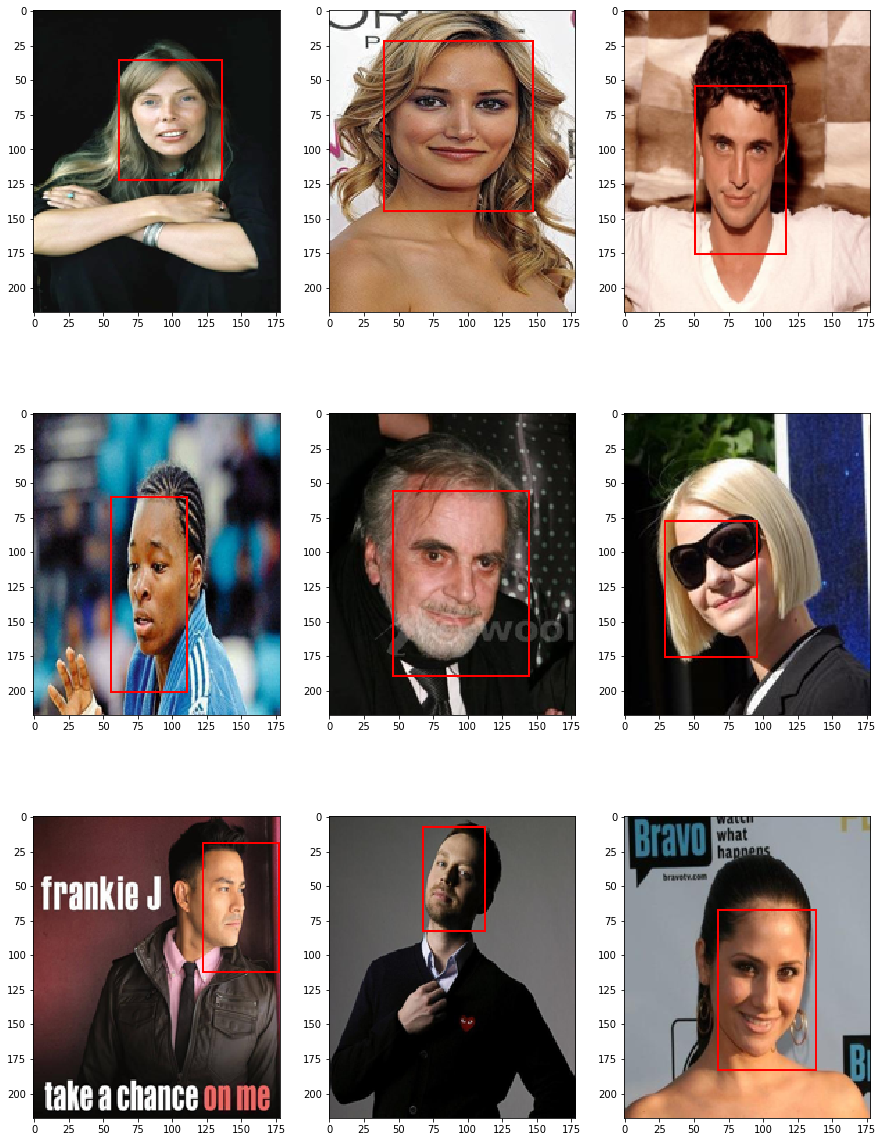

In [54]:
show_some_images(x,y,9)

## 2. Models
Load the 3 chosen models for your given task. Show the model's architecture.

### Question 1
Describe the main differences between the models you chose.

1. [1st Model ](https://github.com/ipazc/mtcnn) MTCNN
2. [2nd Mode](https://github.com/deepinsight/insightface) InsightFace
3. [3rd Model](https://github.com/biubug6/Pytorch_Retinaface) RetinaFace

These are the pretrained models of pytorch.
We are used them for predicting the bboxes of the image.

*InsightFace* and *MTCNN* is an open source 2D&3D deep face analysis toolbox, mainly based on PyTorch and MXNet.

A PyTorch implementation of *RetinaFace*: Single-stage Dense Face Localisation in the Wild. Model size only 1.7M, when Retinaface use mobilenet 0.25 as backbone net. We also provide resnet50 as backbone net to get better result.

In the above link you could find more information about models

#### Load the models
Show the architectures

##### MTCNN


In [39]:
mtcnn = MTCNN()

all_boxes_vggface2 = []
for i in range(3500):
  # row = lm_df.iloc[i]
  # print(x[i].shape)
  im = PIL_image = Image.fromarray(x[i].astype('uint8'), 'RGB')
  boxes, probs = mtcnn.detect(im)
  try:

    boxes = boxes[0]
    all_boxes_vggface2.append(boxes)
  except:
    all_boxes_vggface2.append([0,0,0,0])
  if i % 500 == 0:
    print(i)
  # print(boxes)

0
500
1000
1500
2000
2500
3000


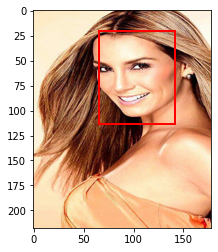

In [42]:
plt.imshow(x[0]/255,interpolation='nearest')
plt.gca().add_patch(Rectangle((all_boxes_vggface2[0][0], all_boxes_vggface2[0][1]), all_boxes_vggface2[0][2]-all_boxes_vggface2[0][0],all_boxes_vggface2[0][3]-all_boxes_vggface2[0][1], linewidth=2, edgecolor='r', facecolor='none'))
plt.show()

##### insightface

In [44]:
import cv2 
app = FaceAnalysis()
app.prepare(ctx_id=0, det_size=(640,640))

all_boxes_faceanalysis = []
for i in range(3500):
  # print(i)
  row = lm_df.iloc[i]

  img = cv2.imread(f"{IMAGE_FOLDER}/" + row['image_id'])
  faces = app.get(img)
  try:
    a = faces[0]["bbox"][0]/sizes[i][0]*img_orig_size[0]
    b = faces[0]["bbox"][1]/sizes[i][1]*img_orig_size[1]
    c = faces[0]["bbox"][2]/sizes[i][0]*img_orig_size[0]
    d = faces[0]["bbox"][3]/sizes[i][1]*img_orig_size[1]
    all_boxes_faceanalysis.append([a,b,c,d])
  except:
    all_boxes_faceanalysis.append([0,0,0,0])
  if i % 500 == 0:
    print(i)
  # break


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
0
500
1000
1

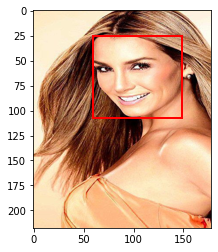

In [45]:
plt.imshow(x[0]/255,interpolation='nearest')
plt.gca().add_patch(Rectangle((all_boxes_faceanalysis[0][0], all_boxes_faceanalysis[0][1]), all_boxes_faceanalysis[0][2] - all_boxes_faceanalysis[0][0],all_boxes_faceanalysis[0][3] - all_boxes_faceanalysis[0][1], linewidth=2, edgecolor='r', facecolor='none'))
plt.show()

In [46]:
all_boxes_faceanalysis[0]

[59.027571326071595, 25.57700157998431, 148.71536650342873, 107.0055836062591]

In [ ]:
y[0]

array([29.73105134, 13.22852984, 70.72860636, 58.31732169])

##### RetinaFace

In [55]:
from skimage import io
from face_detection import RetinaFace

detector = RetinaFace()
all_boxes_RetinaFace = []
# img= io.imread("img_align_celeba/img_align_celeba/202591.jpg")
i = 0
for image in x:
  # print(image)
  faces = detector(image)
  try:
    box, landmarks, score = faces[0]
    all_boxes_RetinaFace.append(box)
  except:
    all_boxes_RetinaFace.append([0,0,0,0])
  if i % 500 == 0:
    print(i)
  i += 1

0
500
1000
1500
2000
2500
3000


array([ 63.7998  ,  23.909836, 139.10628 , 107.52344 ], dtype=float32)

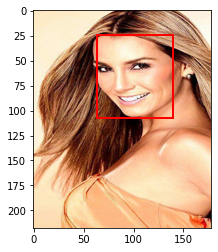

In [58]:
# fig.add_subplot(rows, columns, i+1)
plt.imshow(x[0]/255,interpolation='nearest')
plt.gca().add_patch(Rectangle((all_boxes_RetinaFace[0][0], all_boxes_RetinaFace[0][1]), all_boxes_RetinaFace[0][2]-all_boxes_RetinaFace[0][0], all_boxes_RetinaFace[0][3]-all_boxes_RetinaFace[0][1], linewidth=2, edgecolor='r', facecolor='none'))
plt.show()

## 3. Evaluation
This is the most important part. Please give a detailed comparison between the models.

Define your metrics manually. Do not use pre defined Pytorch metrics.

Calculate the metrics for each model on the test set.

Plot the metrics.

Show some predictions in comparison to the ground truth.

#### Evaluate your models

##### Intersection Over Union

In [77]:
for i in range(len(all_boxes_vggface2)):
  all_boxes_vggface2[i][2] = all_boxes_vggface2[i][2] - all_boxes_vggface2[i][0]
  all_boxes_vggface2[i][3] = all_boxes_vggface2[i][3] - all_boxes_vggface2[i][1]

In [ ]:
for i in range(len(all_boxes_faceanalysis)):
  all_boxes_faceanalysis[i][2] = all_boxes_faceanalysis[i][2] - all_boxes_faceanalysis[i][0]
  all_boxes_faceanalysis[i][3] = all_boxes_faceanalysis[i][3] - all_boxes_faceanalysis[i][1]

In [79]:
for i in range(len(all_boxes_RetinaFace)):
  all_boxes_RetinaFace[i][2] = all_boxes_RetinaFace[i][2] - all_boxes_RetinaFace[i][0]
  all_boxes_RetinaFace[i][3] = all_boxes_RetinaFace[i][3] - all_boxes_RetinaFace[i][1]

In [80]:
all_boxes_vggface2[0],all_boxes_faceanalysis[0],all_boxes_RetinaFace[0],y[0]

(array([64.975815, 20.017431, 76.89696 , 93.27652 ], dtype=float32),
 [59.027571326071595, 25.57700157998431, 89.68779517735713, 81.42858202627478],
 array([63.7998  , 23.909836, 75.30647 , 83.6136  ], dtype=float32),
 array([41.34474328, 22.52983988, 98.35696822, 99.3216885 ]))

In [81]:
def IOU(box1, box2):

  x1, y1, w1, h1 = box1

  x2, y2, w2, h2 = box2

  w_intersection = min(x1 + w1, x2 + w2) - max(x1, x2)

  h_intersection = min(y1 + h1, y2 + h2) - max(y1, y2)

  if w_intersection <= 0 or h_intersection <= 0: 

    return 0

  I = w_intersection * h_intersection

  U = w1 * h1 + w2 * h2 - I 

  return I / U

In [90]:
def Average(lst):
    return sum(lst) / len(lst)

In [88]:
iou_vggface2 = [IOU(y[i], all_boxes_vggface2[i]) for i in range(len(all_boxes_vggface2))]
iou_vggface2 = Average(iou_vggface2)

In [92]:
iou_vggface2

0.5866189978626967

In [94]:
iou_faceanalysis = [IOU(y[i], all_boxes_faceanalysis[i]) for i in range(len(all_boxes_faceanalysis))]
iou_faceanalysis = Average(iou_faceanalysis)

In [95]:
iou_faceanalysis

0.6273478676278549

In [96]:
iou_RetinaFace = [IOU(y[i], all_boxes_RetinaFace[i]) for i in range(len(all_boxes_RetinaFace))]
iou_RetinaFace = Average(iou_RetinaFace)

In [97]:
iou_RetinaFace

0.6169126832025066

##### Right and wrong with thresholds

In [126]:
def rigth_wrong_threshold(y_true,y_pred,threshold):
  rigth_wrong = [0,0]
  for i in range(len(y_true)):
    if y_pred[i][0] + threshold > y_true[i][0] and y_pred[i][0] - threshold < y_true[i][0] and \
    y_pred[i][1] + threshold > y_true[i][1] and y_pred[i][1] - threshold < y_true[i][1] and \
    y_pred[i][2] + threshold > y_true[i][2] and y_pred[i][2] - threshold < y_true[i][2] and \
    y_pred[i][3] + threshold > y_true[i][3] and y_pred[i][3] - threshold < y_true[i][3]:
      rigth_wrong[0] += 1
    else:
      rigth_wrong[1] += 1
  return rigth_wrong

In [127]:
rigth_wrong_vggface = rigth_wrong_threshold(y,all_boxes_vggface2,25)

In [128]:
rigth_wrong_faceanalysis = rigth_wrong_threshold(y,all_boxes_faceanalysis,25)

In [129]:
rigth_wrong_RetinaFace = rigth_wrong_threshold(y,all_boxes_RetinaFace,25)

In [130]:
rigth_wrong_vggface[0]/(rigth_wrong_vggface[0] + rigth_wrong_vggface[1])

0.5045714285714286

In [131]:
rigth_wrong_faceanalysis[0]/(rigth_wrong_faceanalysis[0] + rigth_wrong_faceanalysis[1])

0.6657142857142857

In [132]:
rigth_wrong_RetinaFace[0]/(rigth_wrong_RetinaFace[0] + rigth_wrong_RetinaFace[1])

0.5585714285714286

##### Could not find face

In [134]:
def not_face_count(y_pred):
  count = 0
  for i in y_pred:
    if i[0] == 0 and i[1] == 0 and i[2] == 0 and i[3] == 0:
      count += 1
  
  return count

In [137]:
not_face_vggface = not_face_count(all_boxes_vggface2)

In [138]:
not_face_faceanalysis = not_face_count(all_boxes_faceanalysis)

In [139]:
not_face_RetinaFace = not_face_count(all_boxes_RetinaFace)

In [140]:
not_face_vggface

50

In [141]:
not_face_faceanalysis

22

In [142]:
not_face_RetinaFace

16

#### Show some predictions

In [180]:
def show_images_3_models(images,labels,y_true):
  images_index = random.sample(range(len(images)),3)
  images = [images[i] for i in images_index]
  # label = [label[i] for i in images_index]
  columns = 3
  rows = 1

  fig=plt.figure(figsize=(15, 21))
  y_true = [y_true[i] for i in images_index]
  for i in range(0, 3):
    fig.add_subplot(rows, columns, (i+1))
    plt.imshow(images[i]/255,interpolation='nearest')
    plt.gca().add_patch(Rectangle((y_true[i][0], y_true[i][1]), y_true[i][2], y_true[i][3], linewidth=2, edgecolor='r', facecolor='none'))
  print("Ground truth")
  plt.show()
  for time,label in enumerate(labels):
    fig=plt.figure(figsize=(15, 21))
    label = [label[i] for i in images_index]
    for i in range(0, 3):
      fig.add_subplot(rows, columns, (i+1))
      plt.imshow(images[i]/255,interpolation='nearest')
      plt.gca().add_patch(Rectangle((label[i][0], label[i][1]), label[i][2], label[i][3], linewidth=2, edgecolor='r', facecolor='none'))
    if time == 0:
      print("VggFace model")
    elif time == 1:
      print("faceanalysis model")
    elif time == 2: print("RetinaFace model")
    plt.show()


Ground truth


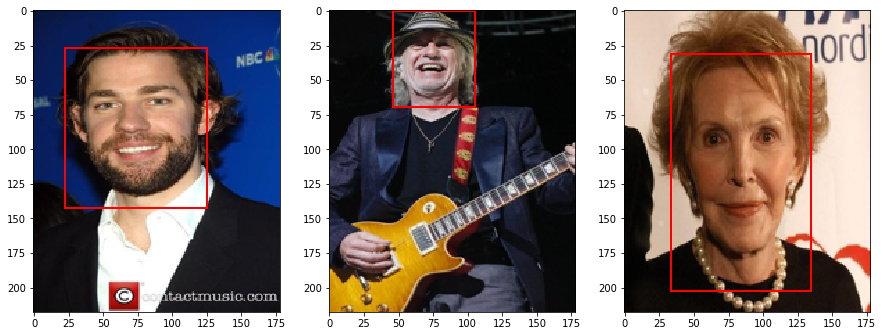

VggFace model


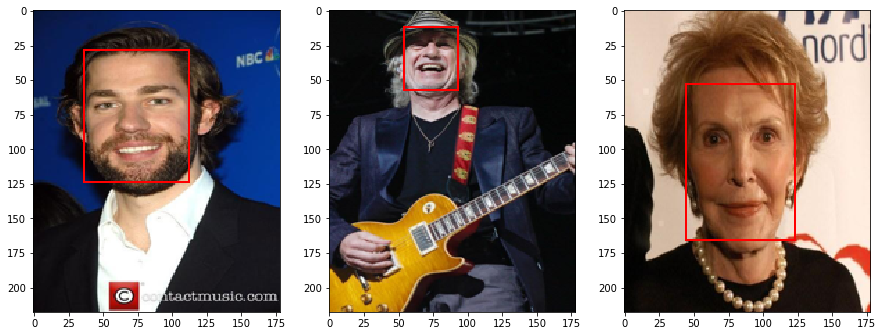

faceanalysis model


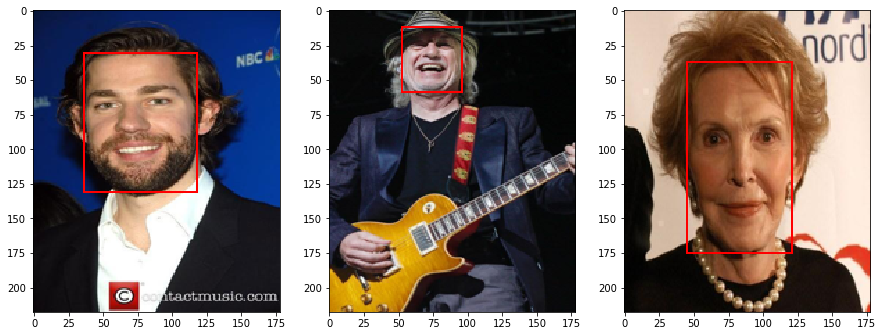

RetinaFace model


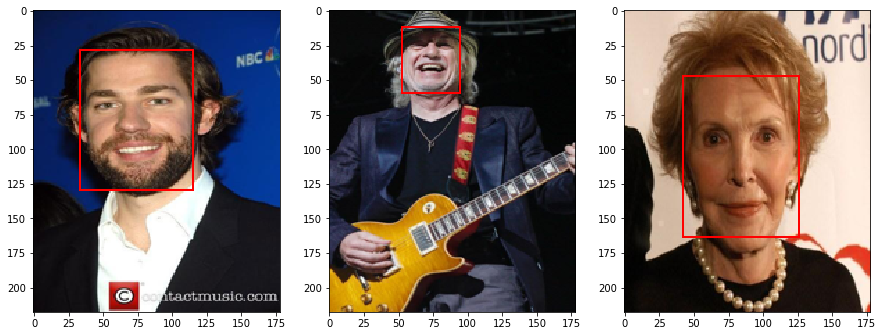

In [181]:

show_images_3_models(x,[all_boxes_vggface2,all_boxes_faceanalysis,all_boxes_RetinaFace],y)

## 4. Conclusion

### Answer the questions
#### Question 2. 
Which model performed the best? Why do you think it performed better than others?



#### Question 3. 
How could you improve the performance of the models?



1. **Answer**

We have seen 3 models:

vggface2, faceanalysis, RetinaFace


The best one was FaceAnalysis, however, it took lots of time to find the faces ~ 1 hour where other models took 5 minutes. That is why RetinaFace and faceanalysis I think are the best and better than vggface2

2. **Answer**


There are some ways to imporve the performace of the models.

1. We could transform the images to grayscale and the models could predict the bboxes better.
2. We could resize image to better size but not to the current one.
3. We could crop the images of the faces and give the model to them.